In [2]:
# 1. Contrast Stretching

import cv2
import numpy as np

img_path = "pictures/Cat.png"

# For 8-bit RGB image
a = 0
b = 255

image = cv2.imread(img_path)

c = 255
d = 0

# Calculate lowest and highest pixel brightness
for i in image:
    for pixel in i:
        c = pixel[0] if pixel[0] < c else c
        d = pixel[0] if pixel[0] > d else d

e = (b - a)/(d - c)

(h, w, _) = image.shape

# Iterate through image to adjust pixels
for i in range(h):
    for j in range(w):
        image[i][j] = (image[i][j] - c) * e + a

cv2.imwrite("output/contrast.png", image)

True

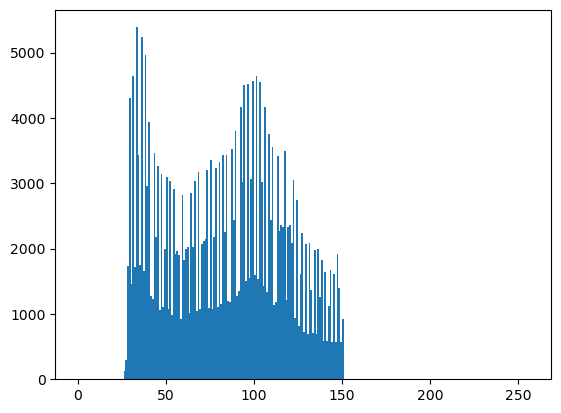

In [3]:
# 2. Histogram Calculation

import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "pictures/Cat.png"

image = cv2.imread(img_path)

h = [0 for i in range(256)]
g = []

for i in image:
    for pixel in i:
        intensity = pixel[0]
        h[intensity] += 1
        g.append(intensity)

# plt.hist(image.ravel,256,[0,256])
plt.hist(g, 256, [0, 256])
plt.show()

In [18]:
# 3. Filtering

import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "pictures/Moon.png"

image = cv2.imread(img_path)

size = 9
n = size // 2

(h, w, _) = image.shape
output1 = image.copy()
output2 = image.copy()

# Iterate through image to adjust pixels
for i in range(h):
    for j in range(w):
        neighbours = []
        for x in range(i - n, i + n):
            for y in range(j - n, j + n):
                try:
                    v = image[x][y][0]
                    neighbours.append(v)
                except IndexError:
                    continue
        
        output1[i][j][0] = output1[i][j][1] = output1[i][j][2] = sum(neighbours) / len(neighbours)
        output2[i][j][0] = output2[i][j][1] = output2[i][j][2] = np.median(neighbours)

cv2.imwrite("output/mean_filter.png", output1)
cv2.imwrite("output/median_filter.png", output2)
            

True